## This script illustrates the structure and linear tranformations of Multivariate Normal Distributions

$$p(x) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}e^{-\frac{1}{2} (x-\mu)^T \Sigma^{-1}(x-\mu)}$$

For the visualization recall that we use the eigen decomposition where $\lambda_k$ is the variance in the $k$'th dimension:

$$\Sigma= V \Lambda V^T = \sum_k \lambda_k v_k v_k^T$$

and the relationship between $X$ and the diagonal $Y$ through the eigen decomposition

$$Y=V^\top (X-\mu) \mbox{  and }  X=VY+ \mu$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# prepare grid for plot

N = 100
Xpoints = np.linspace(-4, 4, N)
Ypoints = np.linspace(-4, 4, N)
X, Y = np.meshgrid(Xpoints, Ypoints)

# Pack X and Y into a single 3-dimensional array
# Use this as a 2D array of (X,Y) coordinates
plotgrid = np.empty(X.shape + (2,))
plotgrid[:, :, 0] = X
plotgrid[:, :, 1] = Y

# to understand this show grid with N=3
# plotgrid

In [6]:
# Part I
# visualizing MVN from its mu and Sigma
# demonstrate effect of parameters on geomtry
# change v1,v2 and s1,s2 to see cahnge in direction and length of axes

# Mean vector
# mu = np.array([2., 2.])
mu = np.array([0., 0.])


# Generate covariance matrix explicilty via its eigen decomposition
# option 1 axis parallel 
v1=np.array([7.0,3.0])
v2=np.array([3.0,7.0])

# option 2: v is +45 degrees rotation matrix
# v1=np.array([1/np.sqrt(2),1/np.sqrt(2)])
# v2=np.array([-1/np.sqrt(2),1/np.sqrt(2)])

# for visualization note: s1 corresponds to direction v1 and has smaller sigma
s1=1.0
s2=1.0
Sigma = s1*np.outer(v1,v1)+ s2*np.outer(v2,v2) 


F = multivariate_normal(mu, Sigma)
Z = F.pdf(plotgrid)

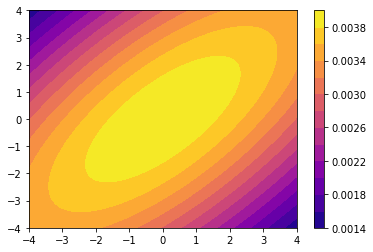

In [7]:
# 15 color levels in plot
#cs = plt.contourf(X, Y, Z,15,cmap=cm.viridis)
cs = plt.contourf(X, Y, Z,15,cmap='plasma')
plt.colorbar(cs)
plt.show()

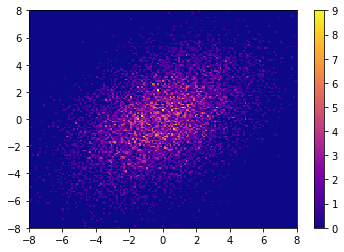

In [5]:
# Part II
# Demonstrates generation of MVN and linear transormations

def plotsample(Z):
    plt.hist2d(Z[0], Z[1], bins=150, range=[[-8,8],[-8,8]], cmap='plasma')
    cb = plt.colorbar()
    plt.show()
    
    
# First sample variable and then apply transformations
np.random.seed(1234)

# generate standard normal vectors - must be in same jupyter cell for reruns
Z = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[7.0, 3.0],
             [3.0, 7.0]],    # covariance matrix
        size=10000
        ).T                   # transpose to get examples in columns 


# show the original samples
plotsample(Z)


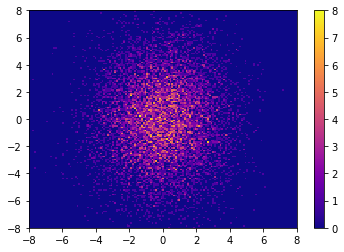

In [18]:
# stretch: multiply by desired std in each dimension
s1 = 4
s2 = 9
# stretched the variances
sig1=np.sqrt(s1) 
sig2=np.sqrt(s2) 

# Z examples are in columns, so each dimension in a row
Z[0]=sig1*Z[0]
Z[1]=sig2*Z[1]

# show the modified samples
plotsample(Z)

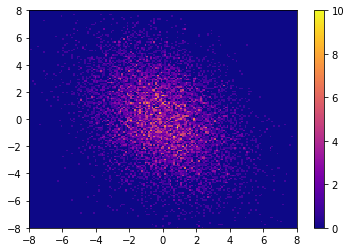

In [19]:
# prepare V matrix from eigenvectors in previous cells
V=np.zeros((2,2),float)

# applying rotation for 30 degrees
v1=np.array([np.sqrt(3)/2,1/2])
v2=np.array([-1/2,np.sqrt(3)/2])


V[:,0]=v1 
V[:,1]=v2 

# rotate
Z=np.dot(V,Z)

# show the modified samples
plotsample(Z)